created 3-12-24
# <mark style="background-color: #B5F4D7"> <font color ='245649'> Residual Streamfunctions </font> </mark>

# <mark style="background-color: #245649"> <font color ='F1B6FF'> Table of Contents </font> </mark>
1. **[Background](#1)** 
2. **[Residual Streamfunction Calculations](#2)**\
    a. [SB](#2a)\
    b. [Medium KD](#2b)\
    c. [Zero KD](#2c)
3. **[Comparison of Residual Streamfunction Plots for Different KD Values](#3)**


# <mark style="background-color: #B5F4D7"> <font color ='F46A45'> 1. Background </font> </mark>
<a name=1></a>


## <font color ='F46A45'> Simulations. </font>
This notebook contains residual streamfunctions for ocean simulations under different conditions where KD is the background diapycnal diffusivity measured in $m^2 /s$.

|FILE NAME | CHANGES |
| :---     | :---    |
|`SB`        | KD = $5 \times 10^{-6}$|
|`medKD`     | KD = $1 \times 10^{-5}$|
|`zeroKD`    | KD = $0$|


## <font color ='F46A45'> Streamfunction explanation. </font>
The residual streamfunction plot shows flow along isopycnals? Eddies are included in the velocity. So velocity = mean + eddies.

Since we have a (x,y,z) plane, and we want to plot in the (z,y) plane, we reduce along the x-dimension by integrating. So 
$$
 v = \frac{\partial^2 \psi}{\partial x \partial z} \implies \int_z^0 \int_{x_W}^{x_E} v \,dx \,dz
$$

In [1]:
import xarray as xr
from xgcm import Grid
import numpy as np
import warnings
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import cmocean.cm as cmo
import cmocean
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)

In [2]:
# set up grid
# use prog file to get zi coordinate

for_grid = xr.open_dataset('/h/kuyeda/3-12_sb/7-17_SB_linear_d2_prog__1410_014.nc')
grid= Grid(for_grid, coords={'X':{'center':'xh','outer':'xq'},'Y':{'center':'yh','outer':'yq'}, 'Z':{'center':'zl','outer':'zi'}},periodic=['X'])

# <mark style="background-color: #F1B6FF"> <font color ='245649'> 2. Residual Streamfunction Calculations </font> </mark>
<a name=2></a>
`uh` and `vh` datavariables are meridional and zonal thicknes flux (velocity weighted by thicknes of grid cell)

## <font color ='245649'> 2a. SB </font> 
<a name=2a></a>

In [3]:
sb = xr.open_dataset('/h/kuyeda/3-12_sb/7-17_SB_linear_d2_cont__1405_015.nc')
# sb = xr.open_dataset('/h/kuyeda/3-12_resid_streamfunction_all/3-12_sb_linear_d2_cont__2105_182.nc',decode_times=True)

# calculate residual streamfunction
mean_uh = sb.uh.mean(dim='Time')
mean_vh = sb.vh.mean(dim='Time')
mean_interp_vh = grid.interp(mean_vh,axis='Y')
sb_resid_sf= (mean_interp_vh.sum('xh').cumsum('zl'))*(10**-6)

/vortex1/jupyter-kuyeda/.local/lib/python3.9/site-packages/xarray/coding/times.py:832: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [4]:
'''
fig,ax = plt.subplots(nrows=1,ncols=1,constrained_layout=True)
clevels = np.arange(-12,12,2)
sb_resid_sf.plot.contourf(levels=clevels,
                         cbar_kwargs={'label':'Sv'})
ax.set_title('Avg Meridional Velo Resid Streamfunction KD = $5\\times 10^{-6}$ \n ' +
             '$\Psi_{Resid} =\int_z \int_x vh \,dx \,dz$')

ax.invert_yaxis()
'''

"\nfig,ax = plt.subplots(nrows=1,ncols=1,constrained_layout=True)\nclevels = np.arange(-12,12,2)\nsb_resid_sf.plot.contourf(levels=clevels,\n                         cbar_kwargs={'label':'Sv'})\nax.set_title('Avg Meridional Velo Resid Streamfunction KD = $5\\times 10^{-6}$ \n ' +\n             '$\\Psi_{Resid} =\\int_z \\int_x vh \\,dx \\,dz$')\n\nax.invert_yaxis()\n"

## <font color ='245649'> 2b. Medium KD </font>
<a name=2b></a>

In [5]:
# medium_KD = xr.open_dataset('/h/kuyeda/3-12_resid_streamfunction_all/3-12_KD1E-5_linear_d2_cont__1500_174.nc',decode_times=False)
medium_KD = xr.open_dataset('/h/kuyeda/3-7_KD1E-5/7-20_KD1E-5_linear_d2_cont__1405_015.nc',decode_times=False)
# ^^ TD = TRUE
# calculate residual streamfunction
mean_uh = medium_KD.uh.mean(dim='Time')
mean_vh = medium_KD.vh.mean(dim='Time')
mean_interp_vh = grid.interp(mean_vh,axis='Y')
medium_KD_resid_sf= (mean_interp_vh.sum('xh').cumsum('zl'))*(10**-6)

In [6]:
'''
fig,ax = plt.subplots(nrows=1,ncols=1,constrained_layout=True)
clevels = np.arange(-12,12,2)
medium_KD_resid_sf.plot.contourf(levels=clevels,
                         cbar_kwargs={'label':'Sv'})
ax.set_title('Avg Meridional Velo Resid Streamfunction KD = $1 \\times 10^{-5}$ \n' + 
             '$\Psi_{Resid} = \int_z \int_x vh \,dx \,dz$')

ax.invert_yaxis()
'''

"\nfig,ax = plt.subplots(nrows=1,ncols=1,constrained_layout=True)\nclevels = np.arange(-12,12,2)\nmedium_KD_resid_sf.plot.contourf(levels=clevels,\n                         cbar_kwargs={'label':'Sv'})\nax.set_title('Avg Meridional Velo Resid Streamfunction KD = $1 \\times 10^{-5}$ \n' + \n             '$\\Psi_{Resid} = \\int_z \\int_x vh \\,dx \\,dz$')\n\nax.invert_yaxis()\n"

##  <font color ='245649'> 2c. Zero KD </font> 
<a name=2c></a>

In [7]:
# zeroKD = xr.open_dataset('/h/kuyeda/3-12_resid_streamfunction_all/KD0_linear_d2_cont__1565_157.nc',decode_times=False)
zeroKD = xr.open_dataset('/h/kuyeda/7-8_KD0/7-20_KD0_linear_d2_cont__1405_015.nc',decode_times=False) 
# ^^ TD = TRUE

# calculate residual streamfunction
# calculate residual streamfunction
mean_uh = zeroKD.uh.mean(dim='Time')
mean_vh = zeroKD.vh.mean(dim='Time')
mean_interp_vh = grid.interp(mean_vh,axis='Y')
zeroKD_resid_sf= (mean_interp_vh.sum('xh').cumsum('zl'))*(10**-6)

In [8]:
'''
fig,ax = plt.subplots(nrows=1,ncols=1,constrained_layout=True)
clevels = np.arange(-12,12,2)
zeroKD_resid_sf.plot.contourf(levels=clevels,
                         cbar_kwargs={'label':'Sv'})
ax.set_title('Avg Meridional Velo Resid Streamfunction KD = 0 \n $\Psi_{Resid} = \int_z \int_x vh \,dx \,dz$')


ax.invert_yaxis()
'''

"\nfig,ax = plt.subplots(nrows=1,ncols=1,constrained_layout=True)\nclevels = np.arange(-12,12,2)\nzeroKD_resid_sf.plot.contourf(levels=clevels,\n                         cbar_kwargs={'label':'Sv'})\nax.set_title('Avg Meridional Velo Resid Streamfunction KD = 0 \n $\\Psi_{Resid} = \\int_z \\int_x vh \\,dx \\,dz$')\n\n\nax.invert_yaxis()\n"

# <mark style="background-color: #F1B6FF"> <font color ='245649'> 3. Comparison of residual streamfunction plots for different KD values. </font> </mark>
<a name=3></a>

Text(0.5, 0.98, '$\\Psi_{resid} = \\int_z^0 \\int_{x_W}^{x_E} \\,v \\,dx \\,dz$')

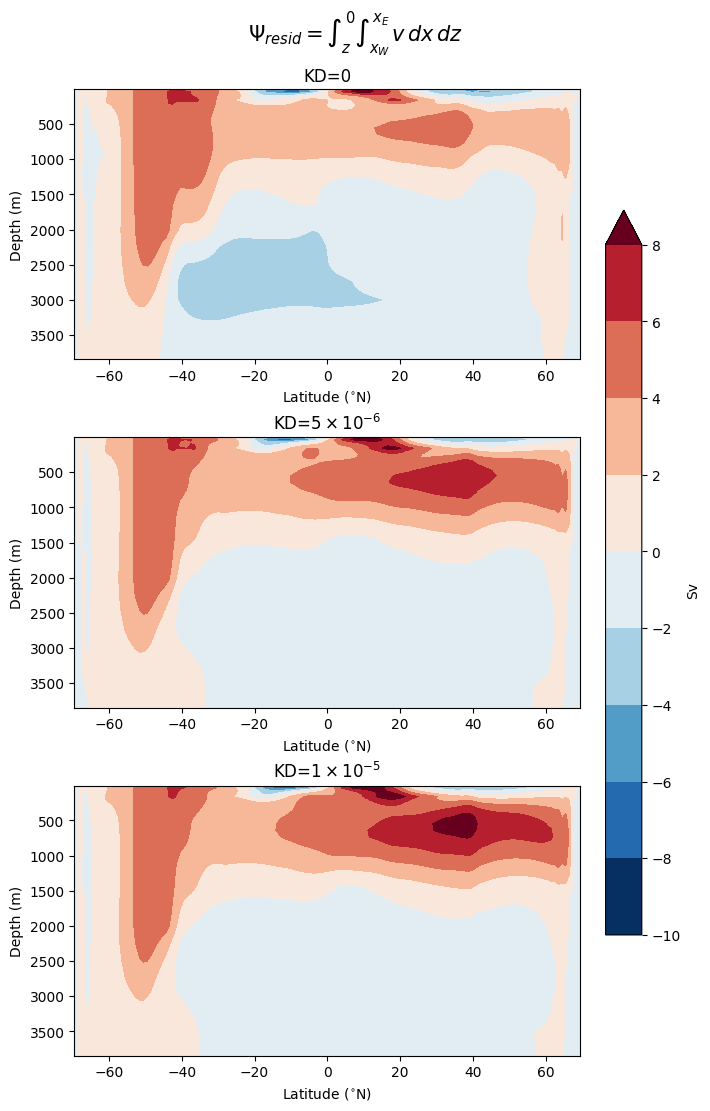

In [15]:
fig,ax = plt.subplots(nrows=3,ncols=1,constrained_layout=True,figsize=(7,11))
sfs = [zeroKD_resid_sf,sb_resid_sf, medium_KD_resid_sf]
title_strings = ['KD=0','KD=$5 \\times 10^{-6}$','KD=$1 \\times 10^{-5}$']
clevels = np.arange(-10,10,2)
for i in range(0,3):
    m = sfs[i].plot.contourf(levels=clevels,ax=ax[i],add_colorbar=False)
    ax[i].set_title(title_strings[i])
    ax[i].invert_yaxis()
    ax[i].set_ylabel('Depth (m)')
    ax[i].set_xlabel('Latitude ($^{\circ}$N)')
    
fig.colorbar(m,ax=ax,label='Sv',shrink=.75)
fig.suptitle('$\\Psi_{resid} = \int_z^0 \int_{x_W}^{x_E} \,v \,dx \,dz$',fontsize=15)